### Lista de exercícios - exercício 5

**Aluno:** André F. Oliveira

O código é construído com base nos algoritmos já criados para os exercícios anteriores dadas as devidas alterações para o cálculo do mapa logístico e do mapa de henon. Resumidamente, o código executa as seguintes tarefas:

1 - Calcula os mapas logístico e de henon simultaneamente com base em parâmetros $\rho$ e $b$ gerados aleatoriamente entre as faixas 3.81-4.00 e 0.21-0.31, respectivamente. O valor de $a$ foi mantido constante e igual a 1.40;<br>
2 - Armazena os momentos estatísticos dos sinais gerados em listas e os concatena em um dataframe que é usado com entrada no algoritmo do k-means;<br>
3 - Exibe na tela os resultados do k-means, assim como qual sinal foi alocado em cada cluster;<br>
4 - Pergunta ao usuário qual sinal deve ser plotado com base nos valores de $rho$, $a$ e $b$; <br>
5 - Exibe os gráficos do atrator, sinal e sua localização no espaço de Cullen-Frey;<br>
6 - Ajusta uma PDF automaticamente ao histograma do sinal, mostrando na tela o fitting obtido, o nome do ajuste, seus parâmetros e o erro obtido;<br>
7 - Pergunta ao usuário se ele deseja salvar os sinais gerados em arquivos csv.

Um exemplo de execução é mostrado abaixo.

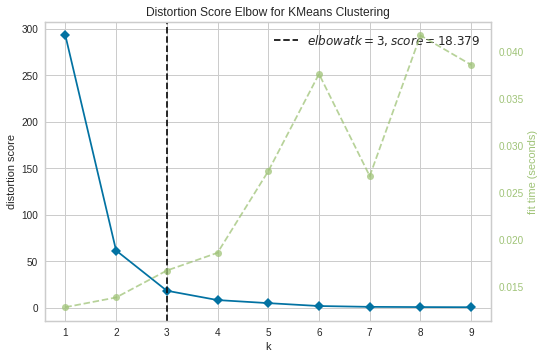

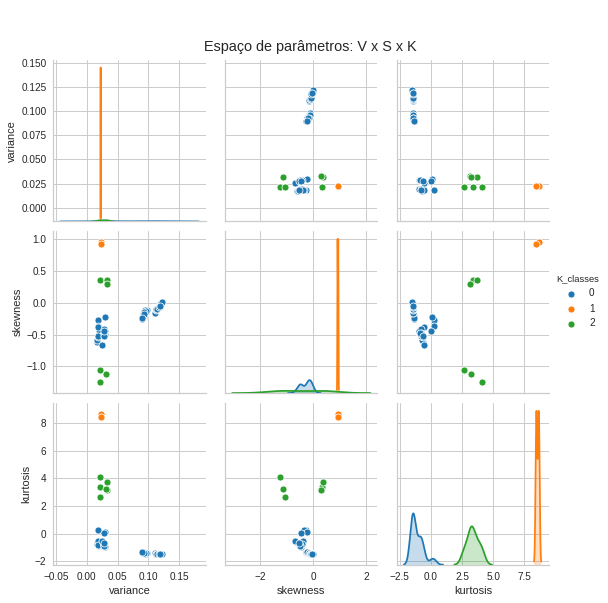

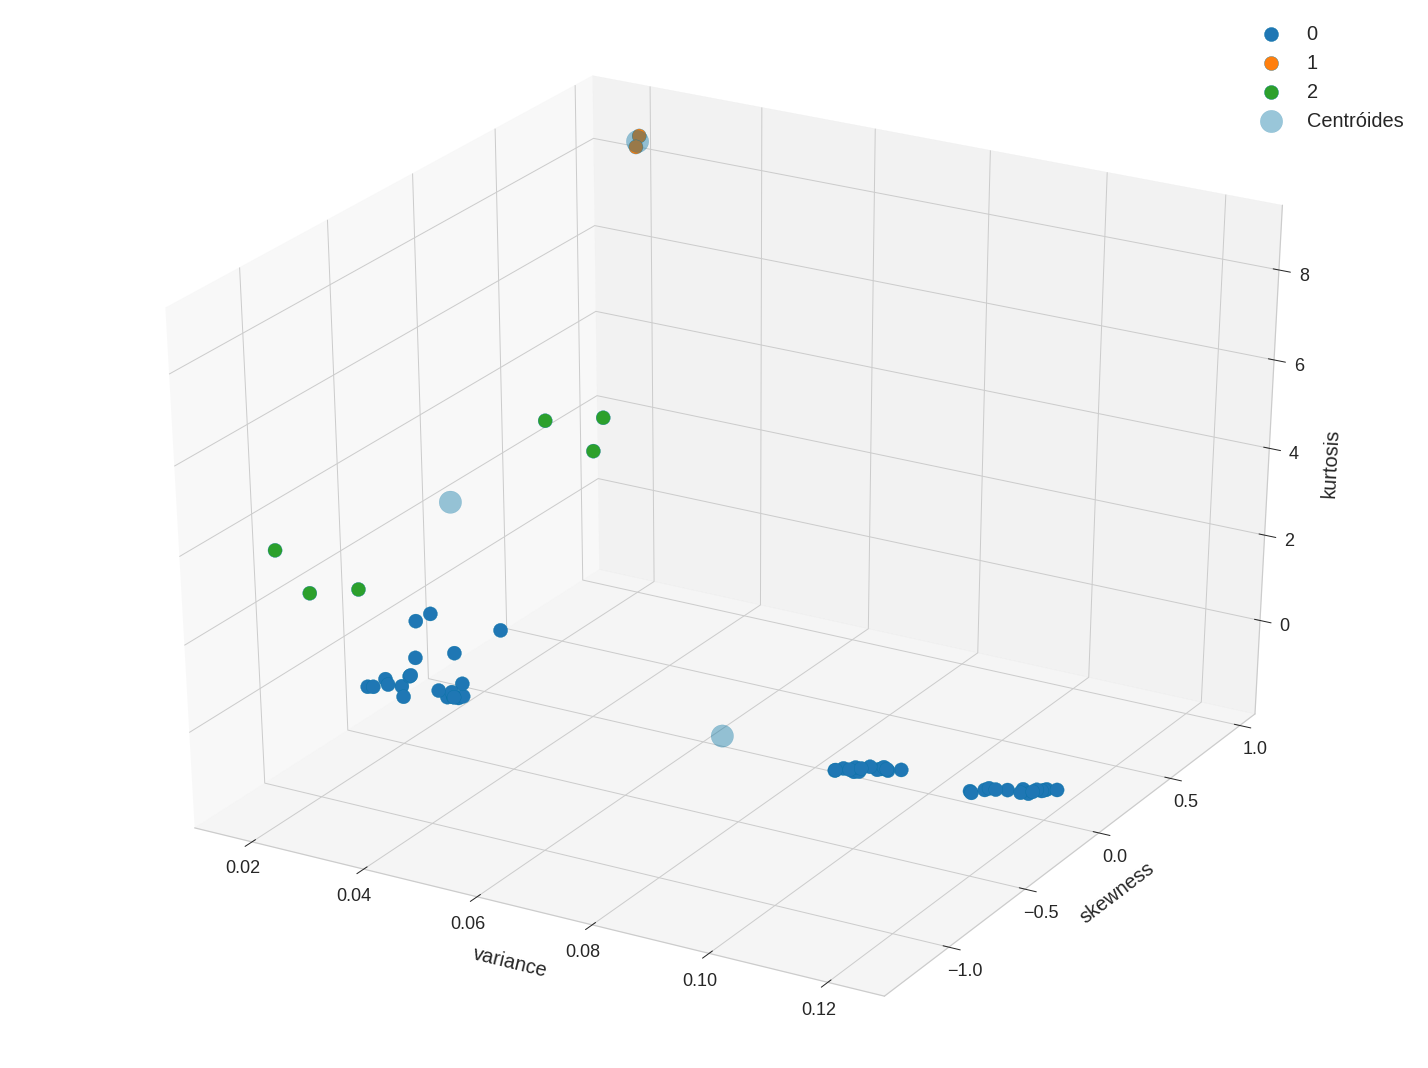



****************** Sinais na classe 0 ******************
                      variance  skewness  kurtosis  K_classes
rho:3.91 iter:0       0.092739 -0.223437 -1.365789          0
rho:3.91 iter:1       0.095203 -0.139414 -1.436104          0
rho:3.91 iter:2       0.098062 -0.112573 -1.439284          0
rho:3.91 iter:3       0.090592 -0.211069 -1.384031          0
rho:3.91 iter:4       0.090181 -0.252840 -1.339516          0
rho:3.91 iter:5       0.096435 -0.138552 -1.440592          0
rho:3.91 iter:6       0.095026 -0.156711 -1.416696          0
rho:3.91 iter:7       0.095058 -0.113248 -1.468358          0
rho:3.91 iter:8       0.093341 -0.212690 -1.369239          0
rho:3.91 iter:9       0.096009 -0.130329 -1.442017          0
rho:3.91 iter:10      0.091728 -0.174375 -1.421296          0
rho:3.91 iter:11      0.091602 -0.208223 -1.388874          0
rho:3.91 iter:12      0.093349 -0.140040 -1.439983          0
rho:3.91 iter:13      0.092669 -0.172836 -1.418882          0
rho:3.91 it

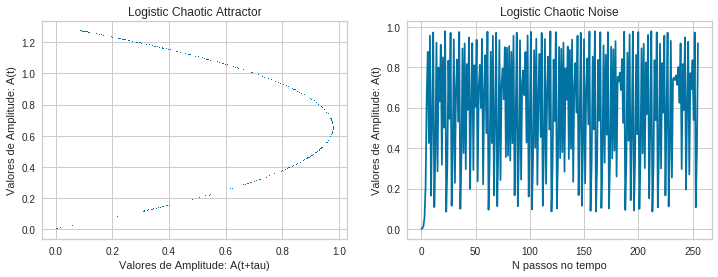

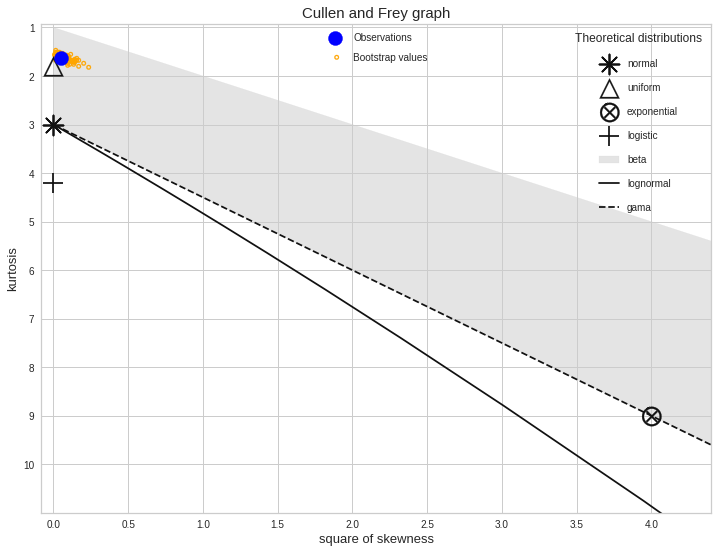

=== summary statistics ===
min:0.0010
max:0.9775
mean:0.5853
standard deviation:0.3045
skewness:-0.2234
kurtosis:-1.3658 +3 for the plot
========== A melhor PDF para ajustar os dados foi:


Melhor pdf: genpareto 
Parâmetros: (-2.6507255004340258, 0.0004302610633504354, 2.5899126926729825)
Erro (SQD): 1.2029538740453738


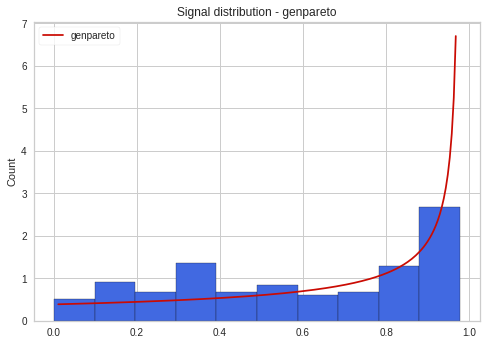




Deseja exibir os resultados de qual série?(1- Logistic | 2- Henon | 0- Sair ): 1
Valor de rho: 3.99
Número da iteração: 0


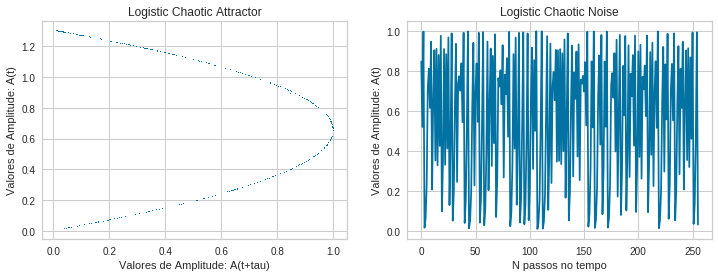

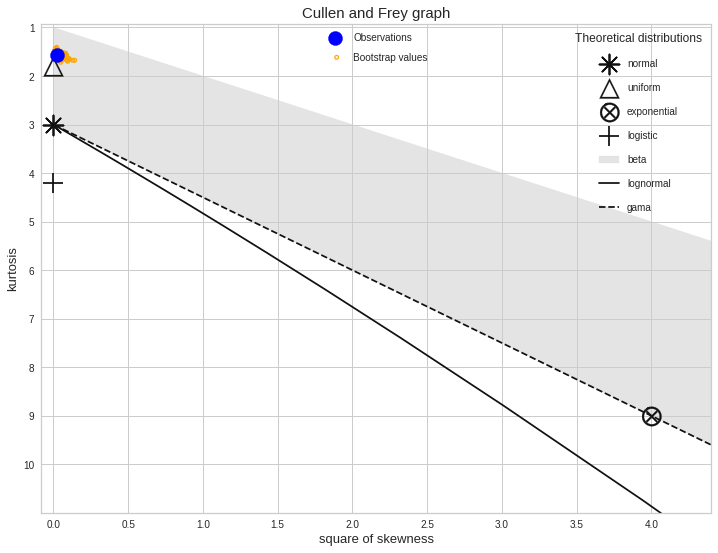

=== summary statistics ===
min:0.0100
max:0.9975
mean:0.5480
standard deviation:0.3333
skewness:-0.1552
kurtosis:-1.4262 +3 for the plot
========== A melhor PDF para ajustar os dados foi:


Melhor pdf: genpareto 
Parâmetros: (-1.5127852279693814, 0.0010568199399445554, 1.5074044325156295)
Erro (SQD): 1.213540090041049


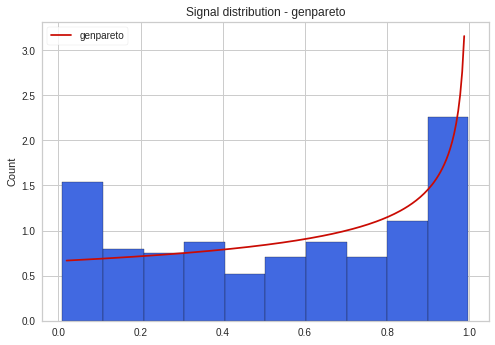




Deseja exibir os resultados de qual série?(1- Logistic | 2- Henon | 0- Sair ): 2
Valor de a: 1.4
Valor de b: 0.21
Número da iteração: 0


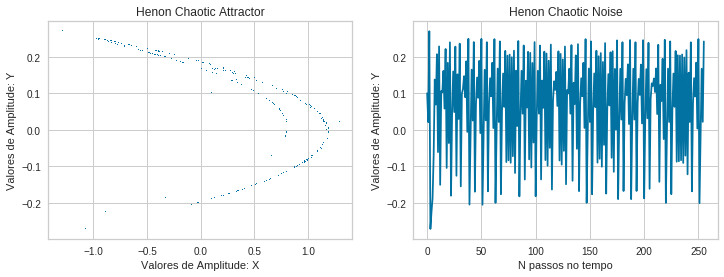

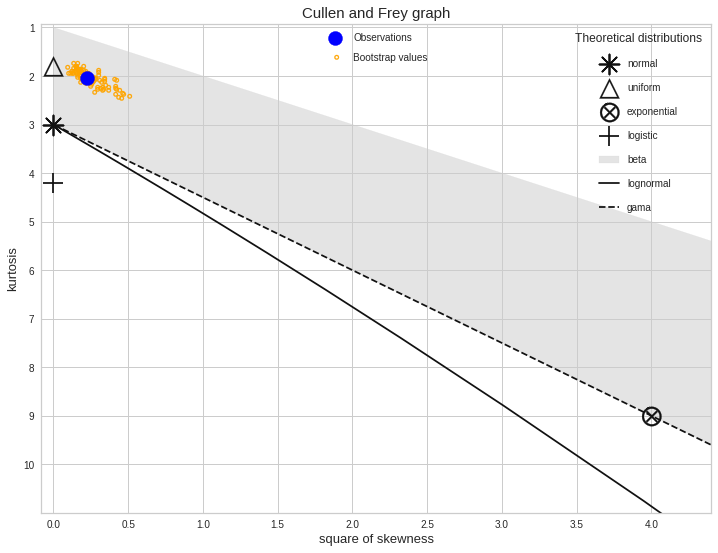

=== summary statistics ===
min:-1.2943
max:1.2860
mean:0.3105
standard deviation:0.6660
skewness:-0.4699
kurtosis:-0.9641 +3 for the plot
========== A melhor PDF para ajustar os dados foi:


Melhor pdf: genextreme 
Parâmetros: (0.6908569584293422, 0.04558938183196949, 0.15597679934240705)
Erro (SQD): 3.4832459944614773


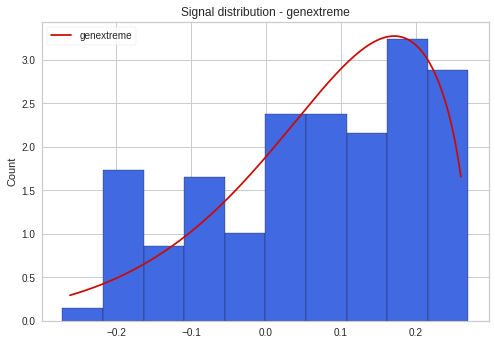




Deseja exibir os resultados de qual série?(1- Logistic | 2- Henon | 0- Sair ): 2
Valor de a: 1.4
Valor de b: 0.25
Número da iteração: 7


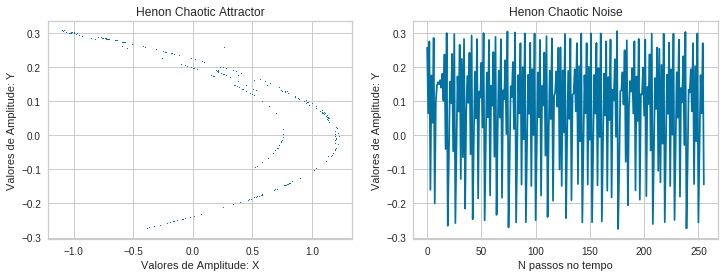

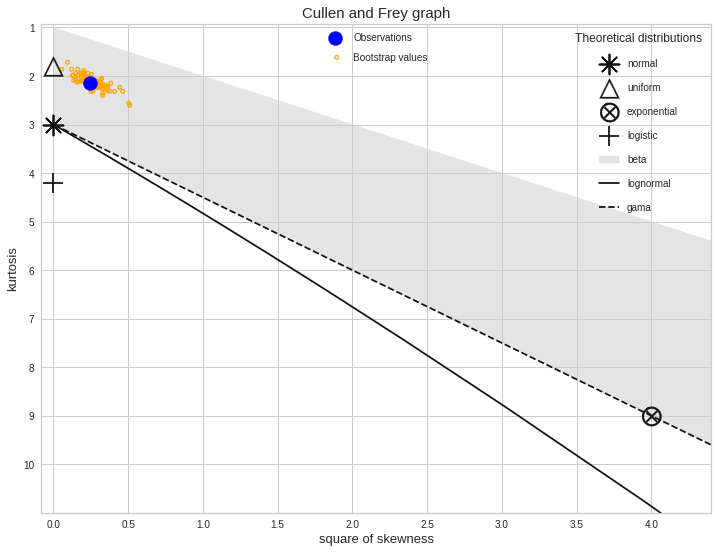

=== summary statistics ===
min:-1.0987
max:1.2232
mean:0.3007
standard deviation:0.6809
skewness:-0.4919
kurtosis:-0.8707 +3 for the plot
========== A melhor PDF para ajustar os dados foi:


Melhor pdf: genpareto 
Parâmetros: (-1.3969557242725021, -0.30114573206951534, 0.8478740457669324)
Erro (SQD): 1.6577322569329724


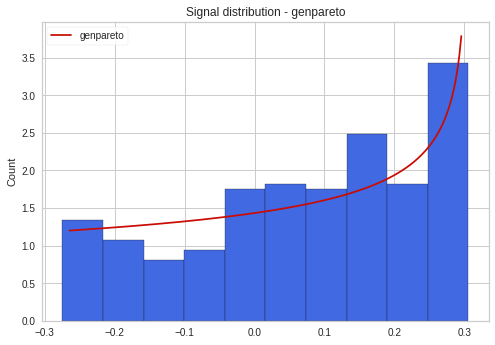




Deseja exibir os resultados de qual série?(1- Logistic | 2- Henon | 0- Sair ): 0

Deseja guardar os momentos estatísticos em arquivo csv? (0- Não | 1- Sim): 0

Encerrando...


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from cullen_frey import graph
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
np.seterr(over='ignore', under='ignore')
plt.rcParams['axes.grid'] = True


def logistic(rho, tau, x, y):
    return rho * x * (1.0 - x), tau * x


def henon_map(a, b, x, y):
    return y + 1.0 - a * x * x, b * x


def kmeans(df_stats):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1, 10))
    visualizer.fit(df_stats)
    visualizer.show()

    n_clusters = visualizer.elbow_value_  # Número ótimo de clusters
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_stats)
    df_stats['K_classes'] = kmeans.labels_

    # Plotando as relações a pares de cada medida estatística (seaborn)
    colors = sns.color_palette('tab10', n_clusters)
    g = sns.pairplot(df_stats, 'K_classes', palette=colors)
    g.fig.suptitle('\n\nEspaço de parâmetros: V x S x K', y=1.09)
    plt.show()

    # Plotando os pontos em 3 dimensões
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')

    labels = df_stats.groupby('K_classes')
    for key, item in labels:
        x = item['variance']
        y = item['skewness']
        z = item['kurtosis']

        ax.scatter(x, y, z, label=key, alpha=1, s=200, edgecolors='b', c=[colors[key]])

    # Plotandos os centróides em 3 dimensões
    x = []
    y = []
    z = []
    for row in kmeans.cluster_centers_:
        x.append(row[0])
        y.append(row[1])
        z.append(row[2])

    ax.scatter(x, y, z, alpha=0.4, s=500, label='Centróides')

    # Ajustando os eixos
    ax.set_xlabel('\n\n' + df_stats.columns[0], fontsize=20)
    ax.set_ylabel('\n\n' + df_stats.columns[1], fontsize=20)
    ax.set_zlabel('\n\n' + df_stats.columns[2], fontsize=20)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.zaxis.set_tick_params(labelsize=18)

    plt.tight_layout()
    plt.legend(loc='best', fontsize=20)
    plt.show()

    # Mostra qual sinal pertence a cada séroe
    for classe in pd.unique(df_stats['K_classes']):
        print(f'\n\n****************** Sinais na classe {classe} ******************')
        print(df_stats.loc[df_stats['K_classes'] == classe])


def plot_serie(x_log, y_log, x_hen, y_hen):
    while True:
        try:
            dist = int(input('\n\n\nDeseja exibir os resultados de qual série?' 
                             '(1- Logistic | 2- Henon | 0- Sair ): '))
        except ValueError:
            print('\n\nDigite apenas 1, 2 ou 0!')
        else:
            if dist == 1:
                a = float(input('Valor de rho: '))
                b = int(input('Número da iteração: '))
                if not 'rho:' + str(a) + ' ' + 'iter:' + str(b) in x_log.columns:
                    print('\n\nValores inválidos!')
                    continue
                else:
                    for nome in x_log.columns:
                        valor_rho = nome.split(' ')[0]
                        valor_iter = nome.split(' ')[1]
                        if 'rho:' + str(a) == valor_rho and 'iter:' + str(b) == valor_iter:
                            fig, ax = plt.subplots(1, 2, figsize=(12, 4))
                            ax[0].plot(x_log[valor_rho + ' ' + valor_iter], y_log[valor_rho + ' ' + valor_iter], 'b,')
                            ax[0].set_title("Logistic Chaotic Attractor")
                            ax[0].set_ylabel("Valores de Amplitude: A(t)")
                            ax[0].set_xlabel("Valores de Amplitude: A(t+tau)")

                            ax[1].plot(x_log[valor_rho + ' ' + valor_iter])
                            ax[1].set_title("Logistic Chaotic Noise")
                            ax[1].set_ylabel("Valores de Amplitude: A(t)")
                            ax[1].set_xlabel("N passos no tempo")
                            plt.show()

                            # Plota o cullen_frey
                            cullen_frey = graph(x_log[valor_rho + ' ' + valor_iter], boot=100)
                            # Ajusta a PDF
                            name = valor_rho + ' ' + valor_iter
                            fitting(x_log[name], name)

            elif dist == 2:
                a = float(input('Valor de a: '))
                b = float(input('Valor de b: '))
                c = int(input('Número da iteração: '))
                if not 'a:' + str(a) + ' ' + 'b:' + str(b) + ' ' + 'iter:' + str(c) in x_hen.columns:
                    print('\n\nValores inválidos!')
                    continue
                else:
                    for nome in x_hen.columns:
                        valor_a = nome.split(' ')[0]
                        valor_b = nome.split(' ')[1]
                        valor_iter = nome.split(' ')[2]
                        if 'a:' + str(a) == valor_a and 'b:' + str(b) == valor_b and 'iter:' + str(c) == valor_iter:
                            fig, ax = plt.subplots(1, 2, figsize=(12, 4))
                            ax[0].plot(x_hen[valor_a + ' ' + valor_b + ' ' + valor_iter],
                                       y_hen[valor_a + ' ' + valor_b + ' ' + valor_iter], 'b,')
                            ax[0].set_title("Henon Chaotic Attractor")
                            ax[0].set_ylabel("Valores de Amplitude: Y")
                            ax[0].set_xlabel("Valores de Amplitude: X")

                            ax[1].plot(y_hen[valor_a + ' ' + valor_b + ' ' + valor_iter])
                            ax[1].set_title("Henon Chaotic Noise")
                            ax[1].set_ylabel("Valores de Amplitude: Y")
                            ax[1].set_xlabel("N passos no tempo")
                            plt.show()

                            # Plota o cullen_frey
                            cullen_frey = graph(x_hen[valor_a + ' ' + valor_b + ' ' + valor_iter], boot=100)
                            # Ajusta a PDF
                            name = valor_a + ' ' + valor_b + ' ' + valor_iter
                            fitting(y_hen[name], name)

            else:
                break


def fitting(df, name):
    # Algumas distribuições usadas no fitting
    distributions = ['invgauss', 'burr12', 'halfgennorm', 'genextreme', 'exponpow', 'expon', 'genpareto', 'invgamma',
                     'gilbrat', 'wald', 'genpareto', 'norm','uniform']

    fitted_errors = {}
    fitted_params = {}

    for distribution in distributions:
        dist = eval('stats.' + distribution)
        y_, x_ = np.histogram(df, bins=10, density=True)
        # np.histogram retorna x com N+1 valores. É necessário então rearranjar seus elementos para N valores
        x = [(this + x_[i + 1]) / 2. for i, this in enumerate(x_[0:-1])]
        param = dist.fit(df)
        pdf_fitted = dist.pdf(x, *param)
        # erro soma do erro quadrático
        sq_error = np.sum((y_ - pdf_fitted) ** 2)
        fitted_params[distribution] = param[:]
        fitted_errors[distribution] = sq_error

    name = pd.DataFrame({'SSE': fitted_errors}).sort_values('SSE').iloc[0].name
    params = fitted_params[name]
    error = fitted_errors[name]

    print('========== A melhor PDF para ajustar os dados foi:\n')
    print(f'\nMelhor pdf: \033[1m{name}\033[0m \nParâmetros: {params}\nErro (SQD): {error}')
    bins = 10
    x = np.linspace(min(df) + 0.1 / bins, max(df) - 0.1 / bins, 200)

    dist = eval('stats.' + name)
    plt.plot(x, dist.pdf(x, *params), color='r', label=name)
    plt.hist(df, bins=bins, ec='k', color='royalblue', density=True)
    plt.title(f'Signal distribution - {name}')
    plt.ylabel('Count')
    plt.grid(True)
    plt.legend(loc='best', frameon=True)
    plt.show()


def folder_creator(path):
    """
    Se o diretório não existe, cria o diretório com o valor de path
    """
    if not os.path.exists(path):
        os.makedirs(path)


def nome_unico(nome_arquivo):
    """
    Se o arquivo existe, adiciona um número ao seu nome.
    Ex: se momentos_1.csv existe, cria arquivo momentos_2.csv
    """
    f = 0
    while os.path.exists(nome_arquivo):
        f += 1
        ext = '.' + nome_arquivo.split('.')[1]
        num = int(nome_arquivo.split('.')[0][-1]) + f
        nome_arquivo = nome_arquivo.split('.')[0][:-1] + str(num) + ext
    return nome_arquivo


def salva_arquivos(df, df_stats):
    """
    Salva os arquivos em seus respectivos diretórios
    """

    # Salva os sinais
    path = 'sinais/'
    folder_creator(path)
    nome_arquivo = path + 'sinais_0.csv'
    nome_arquivo = nome_unico(nome_arquivo)
    df.to_csv(nome_arquivo, index=True)

    # Salva os momentos estatísticos
    path = 'stats/'
    folder_creator(path)
    nome_arquivo = path + 'momentos_0.csv'
    nome_arquivo = nome_unico(nome_arquivo)
    df_stats.to_csv(nome_arquivo, index=True)


def main():
    # General parameters
    n_series = 15
    N = 2 ** 8
    x_log = []
    y_log = []
    x_hen = []
    y_hen = []

    # Map dependent parameters logistic
    # rho 3.81 até 4.00
    rho = sorted(random.sample([round(n, 2) for n in np.arange(3.81, 4.00, 0.01)], 2))
    tau = 1.3

    # Map dependent parameters henon
    # a 1.350 até 1.420
    # b 0.210 até 0.310
    a = 1.4
    b = sorted(random.sample([round(n, 2) for n in np.arange(0.21, 0.31, 0.01)], 2))

    # Initial Condition logistic
    xtempl = 0.001
    ytempl = 0.001
    # Initial Condition henon
    xtemph = 0.1
    ytemph = 0.3

    for p, n in zip(rho, b):
        for j in range(n_series):
            # Logistic
            xl = [xtempl]
            yl = [ytempl]
            # Henon
            xh = [xtemph]
            yh = [xtemph]
            for i in range(1, N):
                xtempl, ytempl = logistic(p, tau, xtempl, ytempl)
                xtemph, ytemph = henon_map(a, n, xtemph, ytemph)

                # Logistic
                xl.append(xtempl)
                yl.append(ytempl)
                # Henon
                xh.append(xtemph)
                yh.append(ytemph)

            # Logistic
            x_log.append(pd.DataFrame(xl, columns=[f'rho:{p} iter:{j}']))
            y_log.append(pd.DataFrame(yl, columns=[f'rho:{p} iter:{j}']))
            # Henon
            x_hen.append(pd.DataFrame(xh, columns=[f'a:{a} b:{n} iter:{j}']))
            y_hen.append(pd.DataFrame(yh, columns=[f'a:{a} b:{n} iter:{j}']))

    # logistc serie is in x
    # henon serie is n y
    df_log = pd.concat(x_log, axis=1)
    df_hen = pd.concat(y_hen, axis=1)
    df = pd.concat([df_log, df_hen], axis=1)

    df_stats = pd.DataFrame(np.transpose((np.var(df), stats.skew(df), stats.kurtosis(df))),
                            columns=['variance', 'skewness', 'kurtosis'],
                            index=df.columns)

    # Chama o k-means
    kmeans(df_stats)

    # Chama o plot dos sinais
    df_plot_log_x = pd.concat(x_log, axis=1)
    df_plot_log_y = pd.concat(y_log, axis=1)
    df_plot_hen_x = pd.concat(x_hen, axis=1)
    df_plot_hen_y = pd.concat(y_hen, axis=1)
    plot_serie(df_plot_log_x, df_plot_log_y, df_plot_hen_x, df_plot_hen_y)

    # Salvar os arquivos
    while True:
        try:
            save = int(input('\nDeseja guardar os momentos estatísticos em arquivo csv? (0- Não | 1- Sim): '))
        except ValueError:
            print('\nDigite apenas 0 ou 1!')
        else:
            if save == 1:
                salva_arquivos(df, df_stats)
                break
            elif save == 0:
                print('\nEncerrando...')
                break
            else:
                print('\nDigite apenas 0 ou 1!')
                continue


if __name__ == '__main__':
    main()